**ENPM 673 - Perception for autonomous robots**

**Project 1**

Mount the google drive to access files and folders

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The below code reads the input video and extracts individual frames using OpenCV.

Note: The frame rate has manually be chosen as 193 frames per second.

In [ ]:
import cv2
import os


# Path to the input video file
video_path = '/content/drive/MyDrive/ROBO/Perception/object_tracking.mp4'

# Directory to save extracted frames
output_dir = '/content/drive/MyDrive/ROBO/Perception/trial'
os.makedirs(output_dir, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frame rate of the video
fps = 193

# Calculate the duration for which you want to extract frames (in seconds)
duration_seconds = 4

# Calculate the total number of frames to extract
total_frames = int(duration_seconds * fps)
print(total_frames)

# Initialize frame counter
frame_count = 0

while frame_count < total_frames:
    # Read a frame from the video
    ret, frame = cap.read()

    if ret:
        frame_name = f'frame_{frame_count}.jpg'
        cv2.imwrite(os.path.join(output_dir, frame_name), frame)

        # Increment the frame count
        frame_count += 1
    else:
        break

# Release the video capture object
cap.release()

772


The number of frames extracted from the input video is 772, and are saved in a folder named as "trial".

After extracting the frames, the black object has to be detected in each frame. To detect the object, the image is first converted from BGR to grayscale.Further we threshold the grayscale image to obtain a binary image where pixels with intensity greater than 10 are set to 255 (white), and others to 0 (black). And thus we identify the black pixels in the image.

To find the centroid of the black image, we find the mean of the x and y coordinates of the black pixels. Each frame with obtained centroid is saved in the "frames_centroids" folder.

[(5, 1007), (5, 1007), (5, 1007), (5, 1007), (10, 1005), (10, 1005), (10, 1005), (16, 997), (16, 997), (16, 997), (16, 997), (16, 997), (16, 997), (16, 997), (16, 997), (16, 997), (16, 997), (37, 965), (37, 965), (37, 965), (44, 949), (44, 949), (44, 949), (51, 934), (51, 934), (51, 934), (60, 917), (60, 917), (60, 917), (68, 900), (68, 900), (68, 900), (68, 900), (77, 883), (77, 883), (77, 883), (85, 867), (86, 868), (86, 868), (94, 852), (94, 852), (94, 852), (104, 839), (104, 839), (104, 839), (104, 839), (115, 825), (115, 825), (115, 825), (128, 812), (128, 812), (128, 812), (128, 812), (128, 812), (128, 812), (128, 812), (128, 812), (128, 812), (175, 772), (175, 772), (175, 773), (175, 773), (190, 761), (190, 761), (190, 761), (190, 761), (190, 761), (190, 761), (190, 761), (190, 761), (190, 761), (236, 725), (236, 725), (236, 725), (236, 725), (254, 717), (254, 717), (254, 717), (269, 703), (269, 703), (269, 703), (284, 693), (284, 693), (284, 693), (298, 680), (298, 680), (298, 

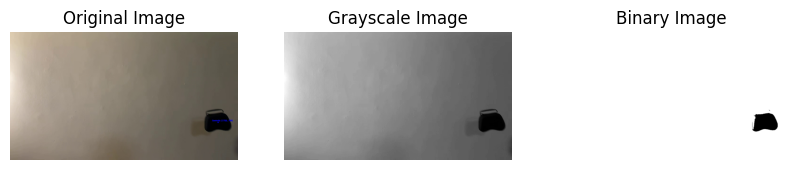

In [ ]:
import os
import cv2
import numpy as np

folder = "/content/drive/MyDrive/ROBO/Perception/trial"
output_folder = "/content/drive/MyDrive/ROBO/Perception/frames_centroids"

# List to store processed image filenames
processed_images = []
centroids = []

# Iterate through each file in the folder
for filename in os.listdir(folder):
    # Read the image
    image = cv2.imread(os.path.join(folder, filename))

    # Convert the image from BGR to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform thresholding
    binary_image = np.zeros_like(gray, dtype=np.uint8)
    binary_image[gray > 10] = 255

    # Find black pixels in the binary image
    black_pixels = np.where(binary_image == 0)

    # Calculate the centroid of the black object for this frame
    if black_pixels[0].size > 0:
        cX = int(np.mean(black_pixels[1]))
        cY = int(np.mean(black_pixels[0]))
        centroids.append((cX, cY))

        # Draw a circle at the centroid for this frame
        cv2.circle(image, (cX, cY), 5, (255, 0, 0), -1)
        cv2.putText(image, f"Centroid: ({cX}, {cY})", (cX - 50, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Save the processed image with centroid to the output folder
    output_filename = os.path.join(output_folder, filename)
    cv2.imwrite(output_filename, image)
    processed_images.append(output_filename)

# Print the centroids for each frame
print(centroids)

# Print the 3 images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis("off")

plt.show()


To fit the curves into parabola using least square method, we first obtain a matrix containing 3 columns A = [$x^2$, $x$ , 1].

To obtain the coefficients of the parabola, we use the normal equation:
X = $(A^T A)^{-1}A^TY$



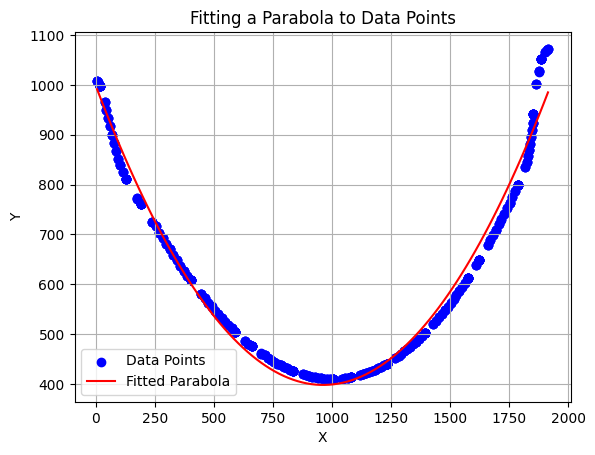

Coefficients of the fitted parabola: [ 6.46594819e-04 -1.24478161e+00  9.97405812e+02]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract x and y coordinates from the data
x = np.array([point[0] for point in centroids])
y = np.array([point[1] for point in centroids])

A = np.vstack([x**2, x, np.ones_like(x)]).T

# Compute the coefficients using the normal equation of least squares
coefficients = np.linalg.inv(A.T @ A) @ A.T @ y

# Generate points for the fitted parabola
x_fit = np.linspace(min(x), max(x), 100)
y_fit = coefficients[0] * x_fit**2 + coefficients[1] * x_fit + coefficients[2]

# Plot the data points and the fitted parabola
plt.scatter(x ,y, color='blue', label='Data Points')
plt.plot(x_fit, y_fit, color='red', label='Fitted Parabola')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a Parabola to Data Points')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients of the fitted parabola
print("Coefficients of the fitted parabola:", coefficients)


Given x value as 1000, we calculate the value of y, using the coefficients obtained above.

In [ ]:
# Extract the coefficients of the fitted parabola
a, b, c = coefficients

# Write the equation of the fitted parabola
equation = f"y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}"
print("Equation of the fitted parabola:", equation)

# Find the value of y when x is 1000
x_value = 1000
y_value = a * x_value**2 + b * x_value + c
print("Value of y when x is 1000:", y_value)


Equation of the fitted parabola: y = 0.00x^2 + -1.24x + 997.41
Value of y when x is 1000: 399.2190210325797


In the below code, we are considering a frame at random, and finding the centroid of the black object in the frame and fitting the trajectory of the object on the frame.

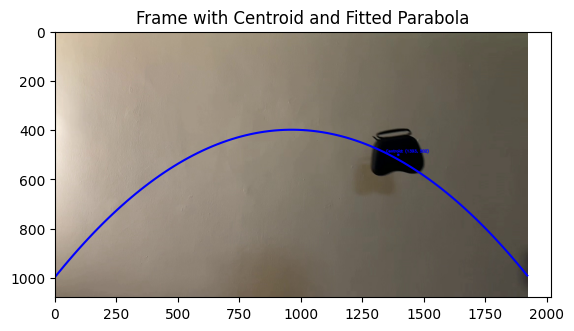

In [ ]:
import os
import cv2
import numpy as np

frame_path = "/content/drive/MyDrive/ROBO/Perception/trial/frame_579.jpg"
frame = cv2.imread(frame_path)

# Convert the frame from BGR to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Perform thresholding manually
binary_image = np.zeros_like(gray, dtype=np.uint8)
binary_image[gray > 10] = 255

# Find black pixels in the binary image
black_pixels = np.where(binary_image == 0)


cX = int(np.mean(black_pixels[1]))
cY = int(np.mean(black_pixels[0]))
centroid = (cX, cY)

# Draw a circle at the centroid for this frame
cv2.circle(frame, (cX, cY), 5, (255, 0, 0), -1)
cv2.putText(frame, f"Centroid: ({cX}, {cY})", (cX - 50, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Plot the fitted parabola on the frame (assuming 'a', 'b', 'c' are defined)
x_fit = np.linspace(0, frame.shape[1], 100)
y_fit = a * x_fit**2 + b * x_fit + c

# Display the frame with the centroid and the fitted parabola
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.plot(x_fit, y_fit, color='blue')
plt.title('Frame with Centroid and Fitted Parabola')
plt.show()

